In [1]:
import load_ppe_fun as lp
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
from time import sleep
import pickle
import warnings
import re
import matplotlib.colors as mcolors
from matplotlib.colors import LogNorm
import itertools
import matplotlib.gridspec as gridspec

In [2]:
import importlib
importlib.reload(lp)

<module 'load_ppe_fun' from '/home/arthurhu/BOSS_PPE/load_ppe_fun.py'>

In [2]:
vnum='0001'
nikki = '2025-08-13'
momxy = '69'
target_date = 'target'

sim_config = 'condnuc_qn_disc_nopredictNc'
l_cic = False
target_simconfig = 'condnuc_qn_disc'

plot_dir = 'plots/' + nikki + '/' + sim_config + '/'
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)

n_init = 2

target_mp = 'BIN_TAU' + momxy
# target_mp = 'BIN_TAU' + momxy

# obtaining case related variables
mconfigs = os.listdir(lp.output_dir + nikki)

vars_strs, vars_vn = lp.get_dics(lp.output_dir, target_date, target_simconfig, n_init)
mps, _ = lp.get_mps(lp.output_dir, nikki, sim_config, l_cic, vars_strs)
mps = lp.sort_strings_by_number(mps)
# var_interest = [9, 4, 86]
# var_interest = [4, 86, 119, 120]
var_interest = [115, 116, 117, 118, 4, 86, 119, 120]
# var_interest = [87, 88, 89, 115, 116, 117, 118, 86, 119, 120]
# var_interest = 'all'
if isinstance(var_interest, list):
    indvar_names = [lp.indvar_name_set[idx] for idx in var_interest]
    indvar_enames = [lp.indvar_ename_set[idx] for idx in var_interest]
    indvar_units = [lp.indvar_units_set[idx] for idx in var_interest]

file_info = {'dir': lp.output_dir, 
             'date': nikki, 
             'version_number': vnum,
             'vars_vn': vars_vn}

nc_dict = {}
data_range = {}

In [3]:
for combo in itertools.product(*vars_strs):
    ic_str = "".join(combo)
    for mp in mps:
        file_info.update({'sim_config': sim_config,
                          'date': nikki,
                          'vars_str': list(combo),
                          'mp_config': mp})
        lin_or_log = lp.load_KiD(file_info, var_interest, nc_dict, data_range, continuous_ic=l_cic)
    
    file_info.update({'sim_config': target_simconfig,
                      'date': target_date,
                      'vars_str': list(combo),
                      'mp_config': target_mp})
    lin_or_log = \
            lp.load_KiD(file_info, var_interest, nc_dict, data_range, False)


In [4]:
nc_dict['Na200w2']['BIN_TAU69'].keys()

dict_keys(['Na', 'w', 'M3', 'M0', 'Mx', 'My', 'LWP', 'LNP', 'Mx_path', 'My_path'])

/tmp/ipykernel_2423621/1007431213.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(time, z, np.log10(nc_dict['Na200w2']['BIN_TAU69']['My']), cmap='Blues')


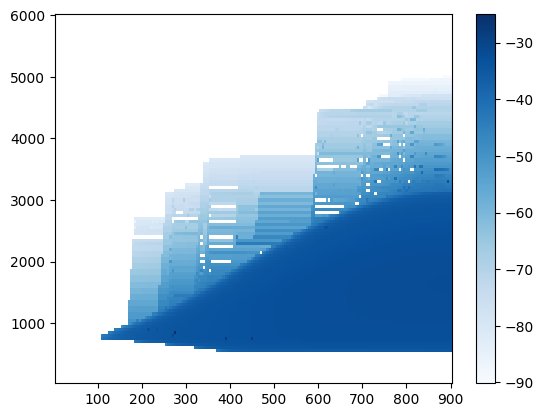

In [13]:
time = nc_dict['time']
z = nc_dict['z']
plt.pcolormesh(time, z, np.log10(nc_dict['Na200w2']['BIN_TAU69']['My']), cmap='Blues')
plt.colorbar()

/tmp/ipykernel_2423621/329525401.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(time, z, np.log10(nc_dict['Na200w2']['boss_4m69']['My']), cmap='Blues')


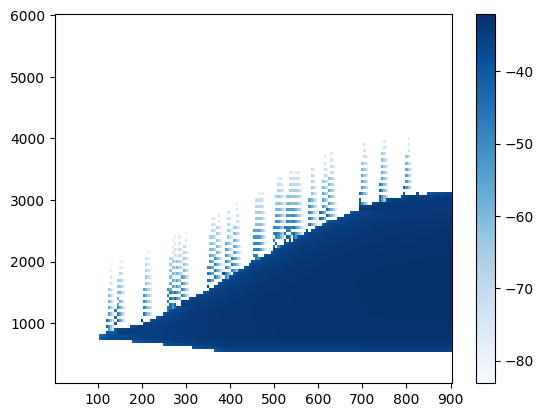

In [14]:
time = nc_dict['time']
z = nc_dict['z']
plt.pcolormesh(time, z, np.log10(nc_dict['Na200w2']['boss_4m69']['My']), cmap='Blues')
plt.colorbar()

In [ ]:
# mom_diff = nc_dict['Na200w2']['BIN_TAU69']['Mx'] - nc_dict['Na200w2']['boss_4m69']['Mx']
# plt.pcolormesh(nc_dict['time'], nc_dict['z'], mom_diff, cmap='bwr')
# val_extreme = np.max(np.abs(mom_diff))
# plt.clim(-val_extreme, val_extreme)
# plt.title('TAU - BOSS')
# plt.colorbar()
# plt.show()

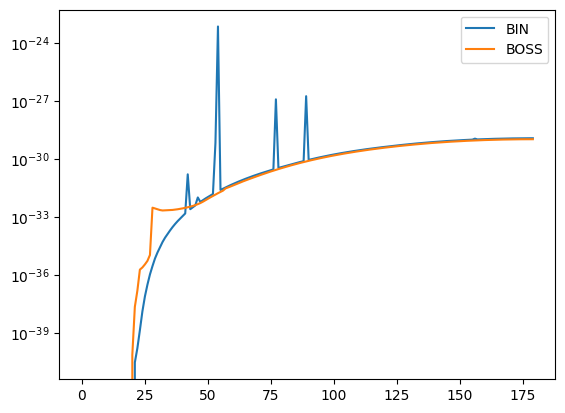

In [15]:
m3_ratio = nc_dict['Na200w2']['BIN_TAU69']['LWP']/nc_dict['Na200w2']['boss_4m69']['LWP']
plt.plot(nc_dict['Na200w2']['BIN_TAU69']['My_path'],label='BIN')
plt.plot(nc_dict['Na200w2']['boss_4m69']['My_path'],label='BOSS')
plt.yscale('log')
plt.legend()
plt.show()

In [226]:
# import matplotlib.gridspec as gridspec

# time = nc_dict['time']
# z = nc_dict['z']

# for i, (var_ename, var_units) in enumerate(zip(indvar_enames, indvar_units)):
#     if nc_dict[ic_str]['BIN_TAU'][var_ename].ndim > 1:
#         print(f'comparison plot only available for 1D Variable. {var_ename} has more than one dimension. skipping.')
#         continue
#     fig = plt.figure(figsize=(18,6))
#     gs = gridspec.GridSpec(1,nmp)
#     bin_vals = np.empty((nc_dict[ic_str]['BIN_TAU'][var_ename].size,0))
#     time_axis = np.empty((nc_dict['time'].size,0))
#     boss_vals = {}
#     for mp in mps:
#         boss_vals[mp] = np.empty((nc_dict[ic_str][mp][var_ename].size,0))

#     for combo in itertools.product(*vars_strs):
#         ic_str = "".join(combo)
#         bin_vals = np.append(bin_vals, nc_dict[ic_str]['BIN_TAU'][var_ename])
#         time_axis = np.append(time_axis, nc_dict['time'])
#         for mp in mps:
#             boss_vals[mp] = np.append(boss_vals[mp], nc_dict[ic_str][mp][var_ename])
#         # print(var_ename, nc_dict[ic_str]['boss_4m_3069'][var_ename].ndim)
#         # is_1d = nc_dict[ic_str]['BIN_TAU'][var_ename].ndim == 1
#         # has_water = np.max(nc_dict[ic_str]['BIN_TAU'][var_ename])>0.
        
#         # if is_1d and has_water:
#         #     plt.figure()
#         #     for mp in mps:
#         #         plt.plot(time, nc_dict[ic_str][mp][var_ename], label=mp, ls='--')
#         #     plt.plot(time, nc_dict[ic_str]['BIN_TAU'][var_ename], label='BIN', 
#         #              color='k', linewidth=2)
#         #     plt.xlabel('time [s]')
#         #     plt.ylabel(var_ename + var_units)
#         #     plt.legend()
#         #     plt.yscale('log')
#         #     # plt.title(f'Dm={nc_dict[ic_str]['BIN_TAU'][vars_vn[0]]*1e6}um')
#     for i, mp in enumerate(mps):
#         ax = fig.add_subplot(gs[i])
#         ax.set_aspect('equal')
#         plt.scatter(bin_vals, boss_vals[mp], c=time_axis)
#         plt.colorbar(label='time [s]', ax=ax)
#         ax_min = min(list(ax.get_ylim() + ax.get_xlim()))
#         ax_max = max(list(ax.get_ylim() + ax.get_xlim()))
#         plt.plot([ax_min, ax_max], [ax_min, ax_max])
#         plt.xlabel('BIN ' + var_ename + var_units)
#         plt.ylabel(mp + ' ' + var_ename + var_units)
#         plt.xscale('log')
#         plt.yscale('log')
        

Fall speed: $$V_0 \propto a_{fall} \tilde{m}^{b_{m}}[K_{0,3,x}^{b_{x0}}K_{3,x,y}^{b_{y0}}]$$
$$V_n \propto a_{fall} \frac{\tilde{m}^{b_{m}}}{\tilde{m}^{b_{m}}+m_{lim}^{b_m}}[K_{0,3,x}^{b_{xn}}K_{3,x,y}^{b_{yn}}]$$
where n = 3,6,9

Collision-coalesence,
before:
$$h(\tilde{m}) = a_0 [(\tilde{m}^{b_{small}} + m_{trans}^{b_{small}})^{b_{large}/b_{small}} - m_{trans}^{b_{large}}]$$
after: 
$$h(\tilde{m}) = a_0 \frac{\tilde{m}^{b_n}}{m_{trans}^{b_m} + \tilde{m}^{b_m}}$$

In [4]:
float_re = re.compile(r'(\d+(?:\.\d+)?)$')  # match digits, optional .digits, at end

def numeric_key(s):
    # Find the first sequence of digits in the string
    m = float_re.search(s)
    return float(m.group(1)) if m else 0.0


def get_k(mom_low, mom_mid, mom_high, exp_low, exp_mid, exp_high):
    return np.maximum(mom_low**(2.*(exp_high-exp_mid)/(exp_high-exp_low)) * mom_high**(2.*(exp_mid-exp_low)/(exp_high-exp_low))
                      / mom_mid**2, 1.)

In [ ]:
nz = len(nc_dict['z'])
time_axis = np.tile(nc_dict['time'], (nz,1))
iz = np.arange(20,60)
# iz = 59
cmaps = ['viridis', 'plasma']
# mp = 'BIN_TAU'
# mp = 'boss_4m_3069'
mps = [target_mp, 'boss_4m46']
vars2plot = ['dm0_coal', 'dmx_coal', 'dmy_coal']

K3_exp = [0.42, 1.43, 2.28]
K6_exp = [0.01, 0.57, 1.54]

for i, var in enumerate(vars2plot):
    plt.figure(figsize=(8,6))
    # for combo in itertools.product(*vars_strs):
    for combo in itertools.product([vars_strs[0][4]], vars_strs[1]):
        ic_str = "".join(combo)
        # qc = numeric_key(combo[0])
        # Nd = numeric_key(combo[1])
        # D_i = (qc*1e-3*lp.QtoM3/Nd/1e6)**(1/3)*1e6
        # gs = gridspec.GridSpec(1, len(mps))
        for imp, mp in enumerate(mps):
            # ax = plt.subplot(gs[imp])
            M0 = nc_dict[ic_str][mp]['M0']
            M3 = nc_dict[ic_str][mp]['M3']
            Mx = nc_dict[ic_str][mp]['Mx']
            My = nc_dict[ic_str][mp]['My']
            # pres = nc_dict[ic_str][mp]['pressure']
            K03x = get_k(M0, M3, Mx, 0, 3, 6)
            K3xy = get_k(M3, Mx, My, 3, 6, 9)
            mtilde = M3/M0*1e12
            var_plot = nc_dict[ic_str][mp][var]
            
            # plt.scatter((mtilde[iz,:] * K03x[iz,:]**K3_exp[i] * K3xy[iz,:]**K6_exp[i]/pres[iz,:]).flatten(), 
            #             (var_plot[iz,:] * K03x[iz,:]**K3_exp[i] * K3xy[iz,:]**K6_exp[i]/pres[iz,:]).flatten(), 
            #             c=time_axis[iz,:], cmap=cmaps[imp])
            plt.scatter(mtilde[iz,:].flatten(), var_plot[iz,:].flatten(), c=time_axis[iz,:], cmap=cmaps[imp])
            # plt.scatter(nc_dict[ic_str]['BIN_TAU']['dn_liq_coll'][iz,:].flatten(), nc_dict[ic_str]['boss_4m_3069']['dn_liq_coll'][iz,:].flatten(), c=time_axis[iz,:])
            # plt.title(str(round(D_i,1)) + ' $\mu$m ' + mp)
            # plt.colorbar()
    plt.xlabel('M3/M0 * 1e12')
    plt.ylabel(var)
    plt.xscale('log')
    plt.yscale('log')
    # plt.xlim([1e-3, 1e4])
    # plt.ylim([1e-1, 1e6])
    plt.grid()
            # plt.colorbar(label='time [s]')
        # plt.xlim(1e-3, 50)
        # plt.imshow(M0, 
        #     extent=(nc_dict['time'][0], nc_dict['time'][-1], 
        #             nc_dict['z'][0], nc_dict['z'][-1]),
        #     aspect='auto', origin='lower')
        # ax2 = plt.subplot(gs[1])
        # plt.imshow(nc_dict[ic_str][mp]['diagM0_cloud'], 
        #     extent=(nc_dict['time'][0], nc_dict['time'][-1], 
        #             nc_dict['z'][0], nc_dict['z'][-1]),
        #     aspect='auto', origin='lower')
    plt.colorbar(label='time [s]')
    plt.savefig(plot_dir + 'boss_vs_bin_' + var + '.png', dpi=300)

time series of profiles

In [6]:
vars_strs

[['qc0.03',
  'qc0.06',
  'qc0.117',
  'qc0.229',
  'qc0.448',
  'qc0.876',
  'qc1.71',
  'qc3.35',
  'qc6.54'],
 ['Nd50', 'Nd100', 'Nd150', 'Nd200', 'Nd250', 'Nd300', 'Nd350', 'Nd400']]

In [9]:
itertools.product(*vars_strs)

In [13]:
vars_strs[0]

['qc0.03',
 'qc0.06',
 'qc0.117',
 'qc0.229',
 'qc0.448',
 'qc0.876',
 'qc1.71',
 'qc3.35',
 'qc6.54']

8it [00:01,  4.93it/s]


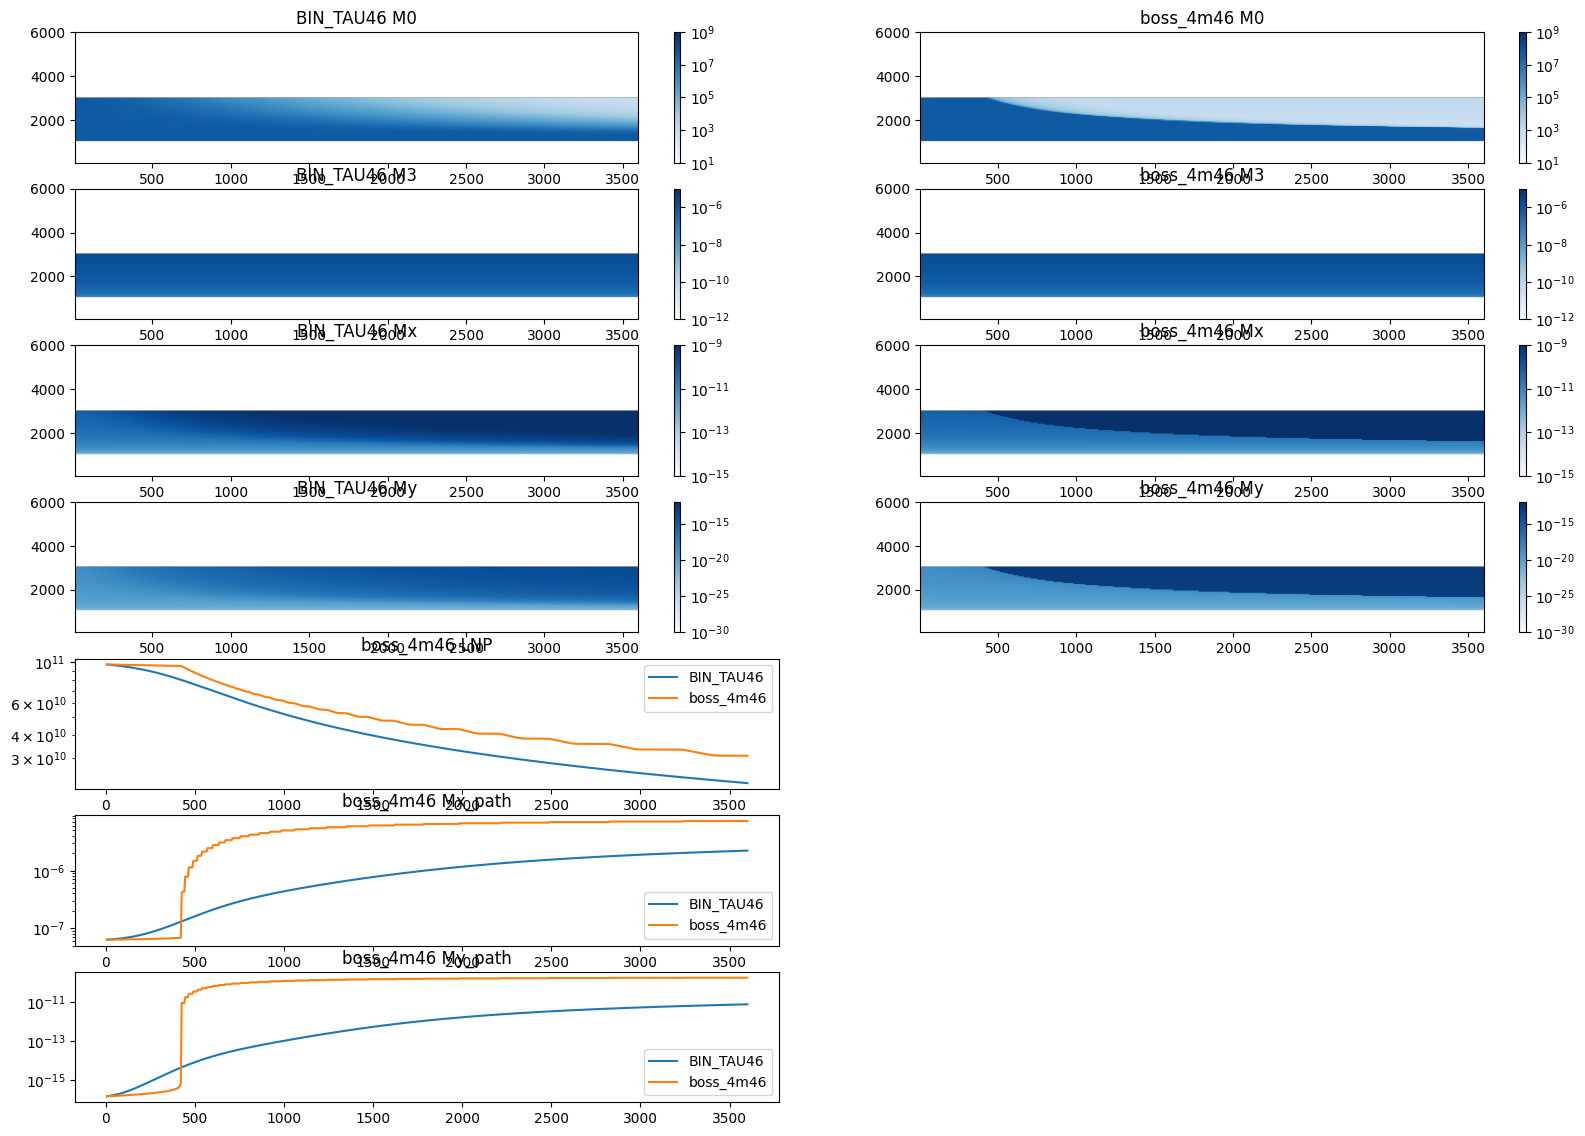

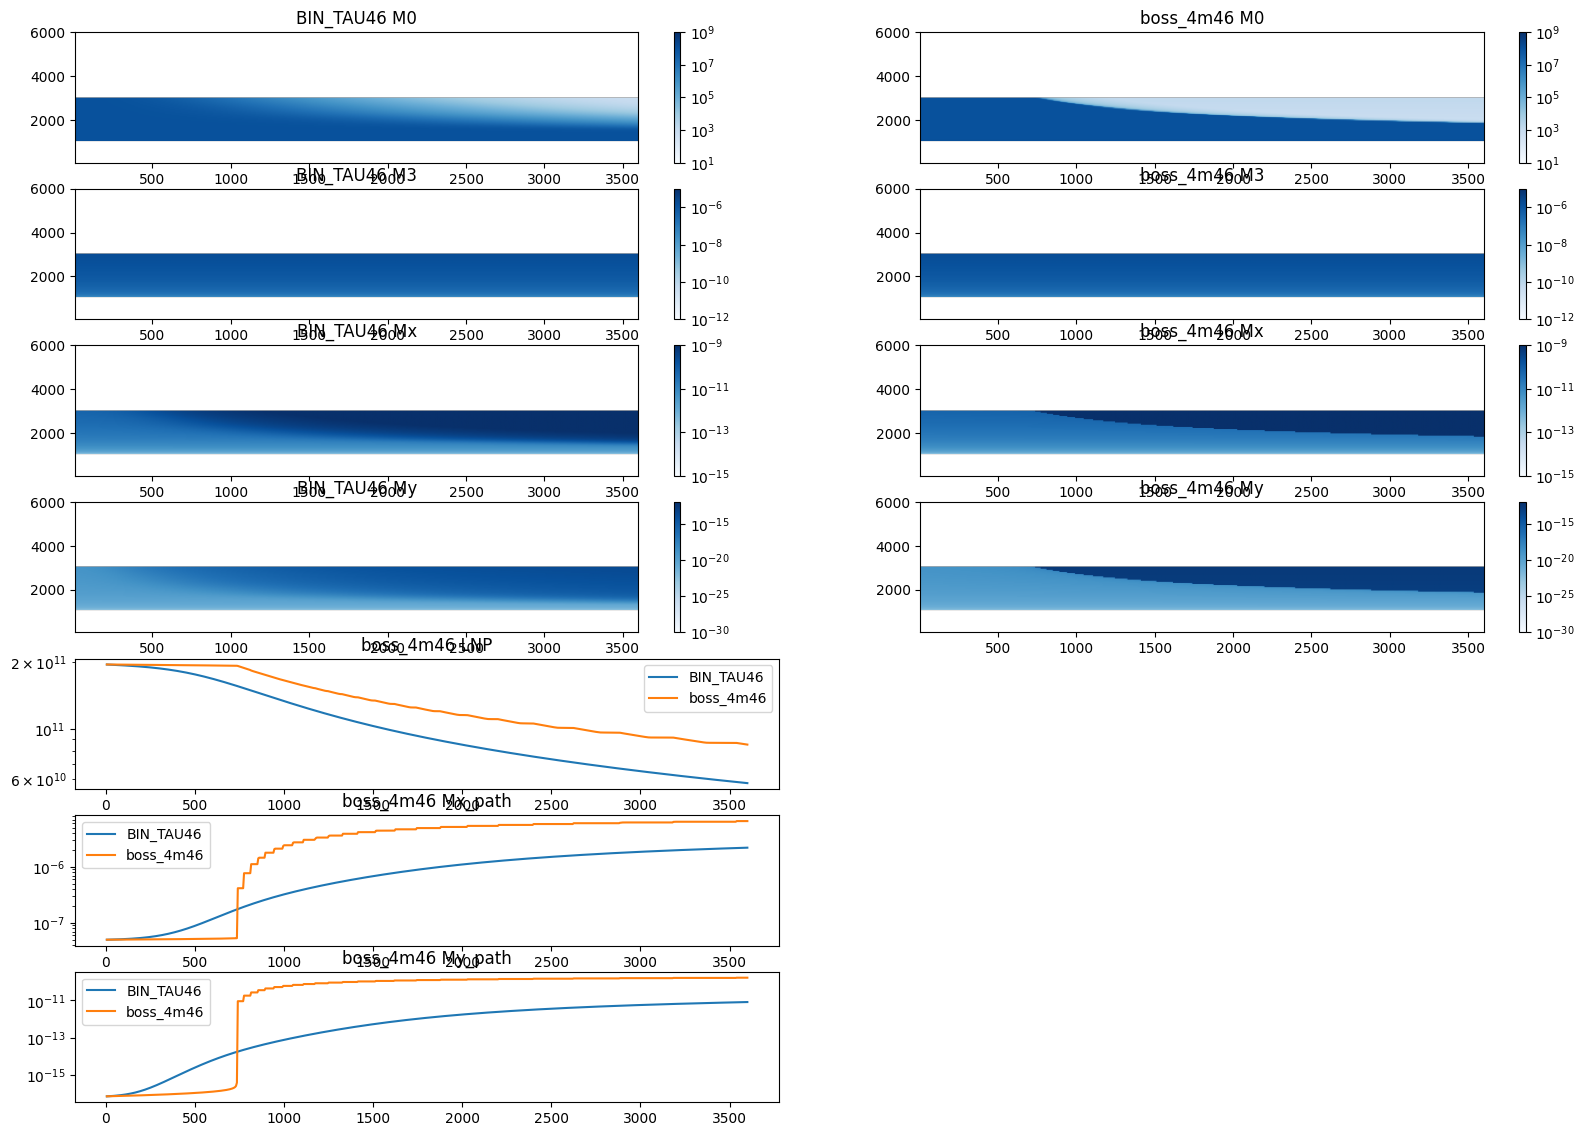

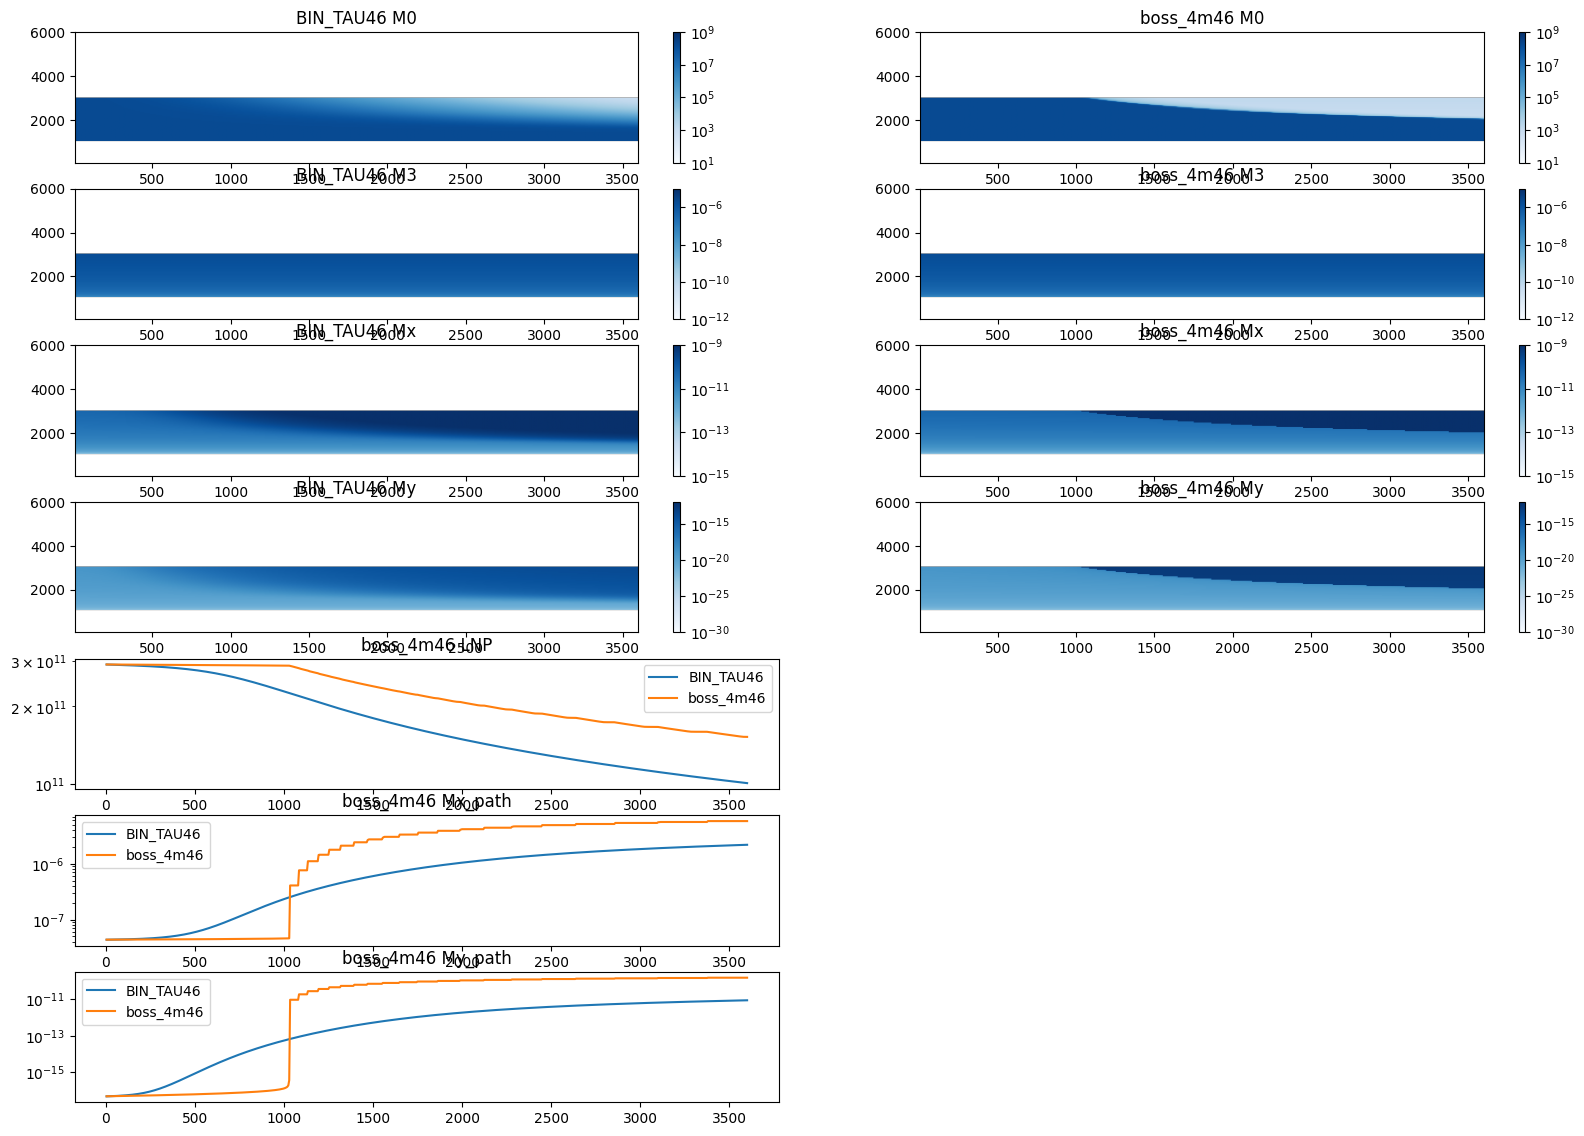

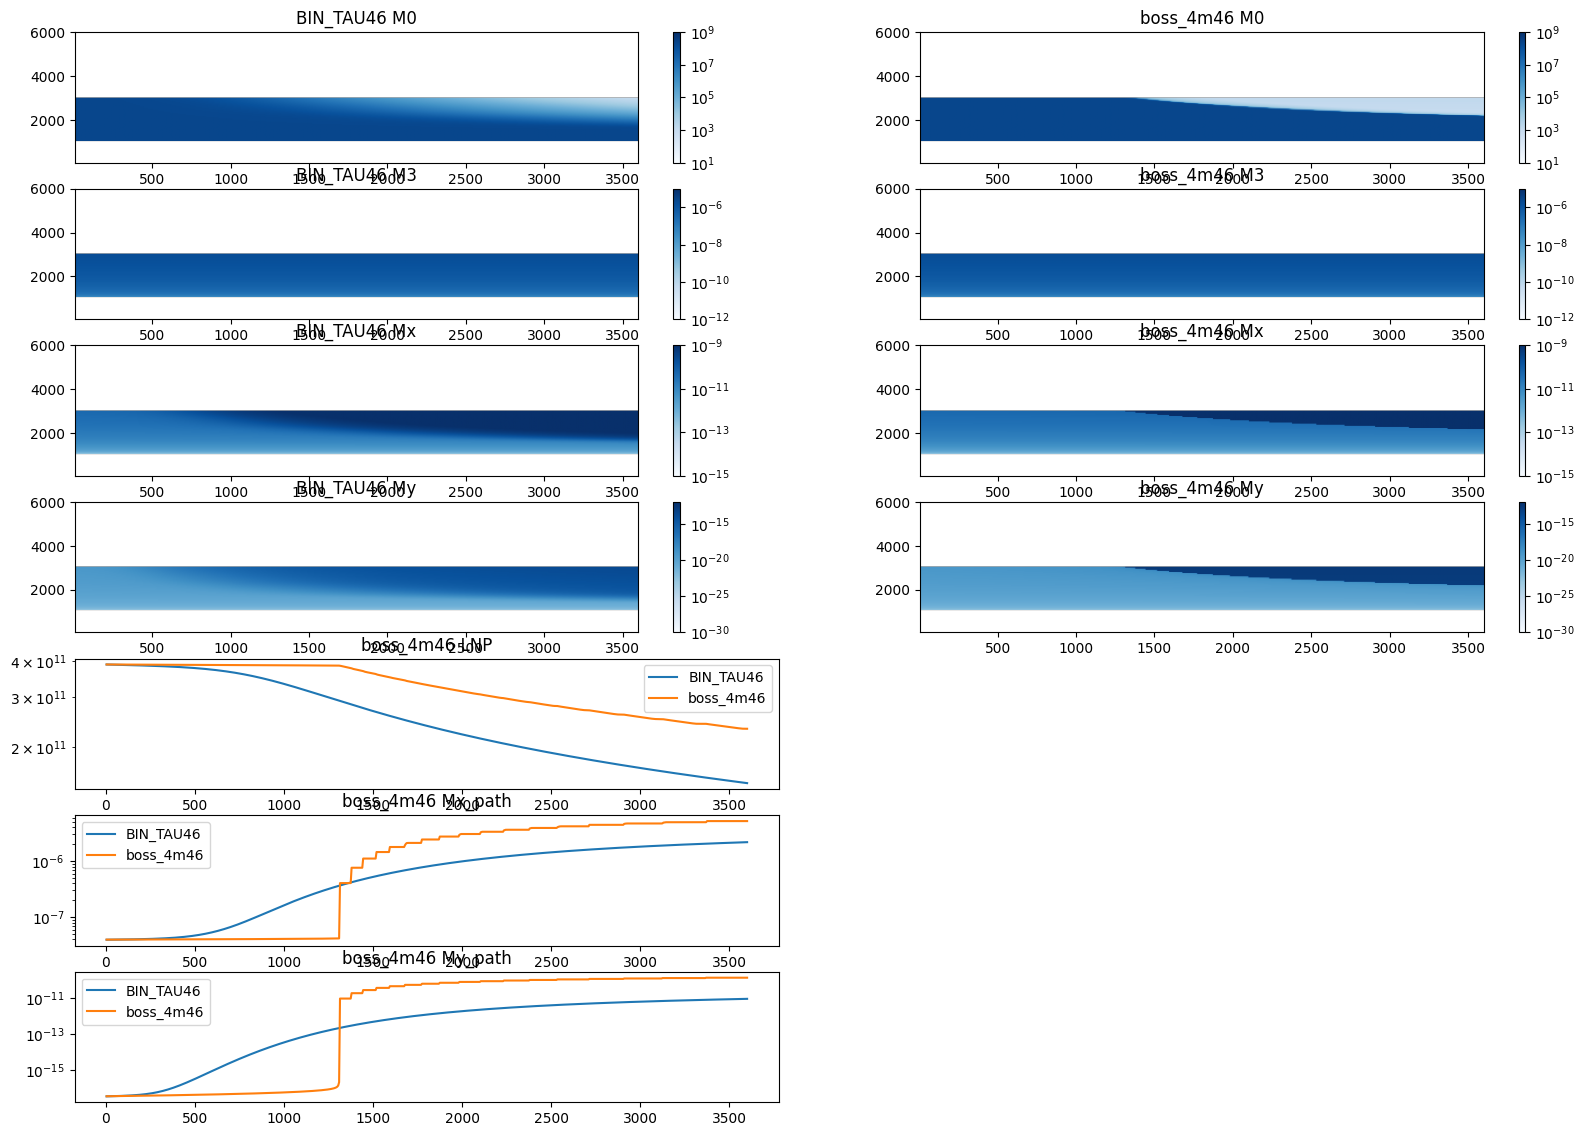

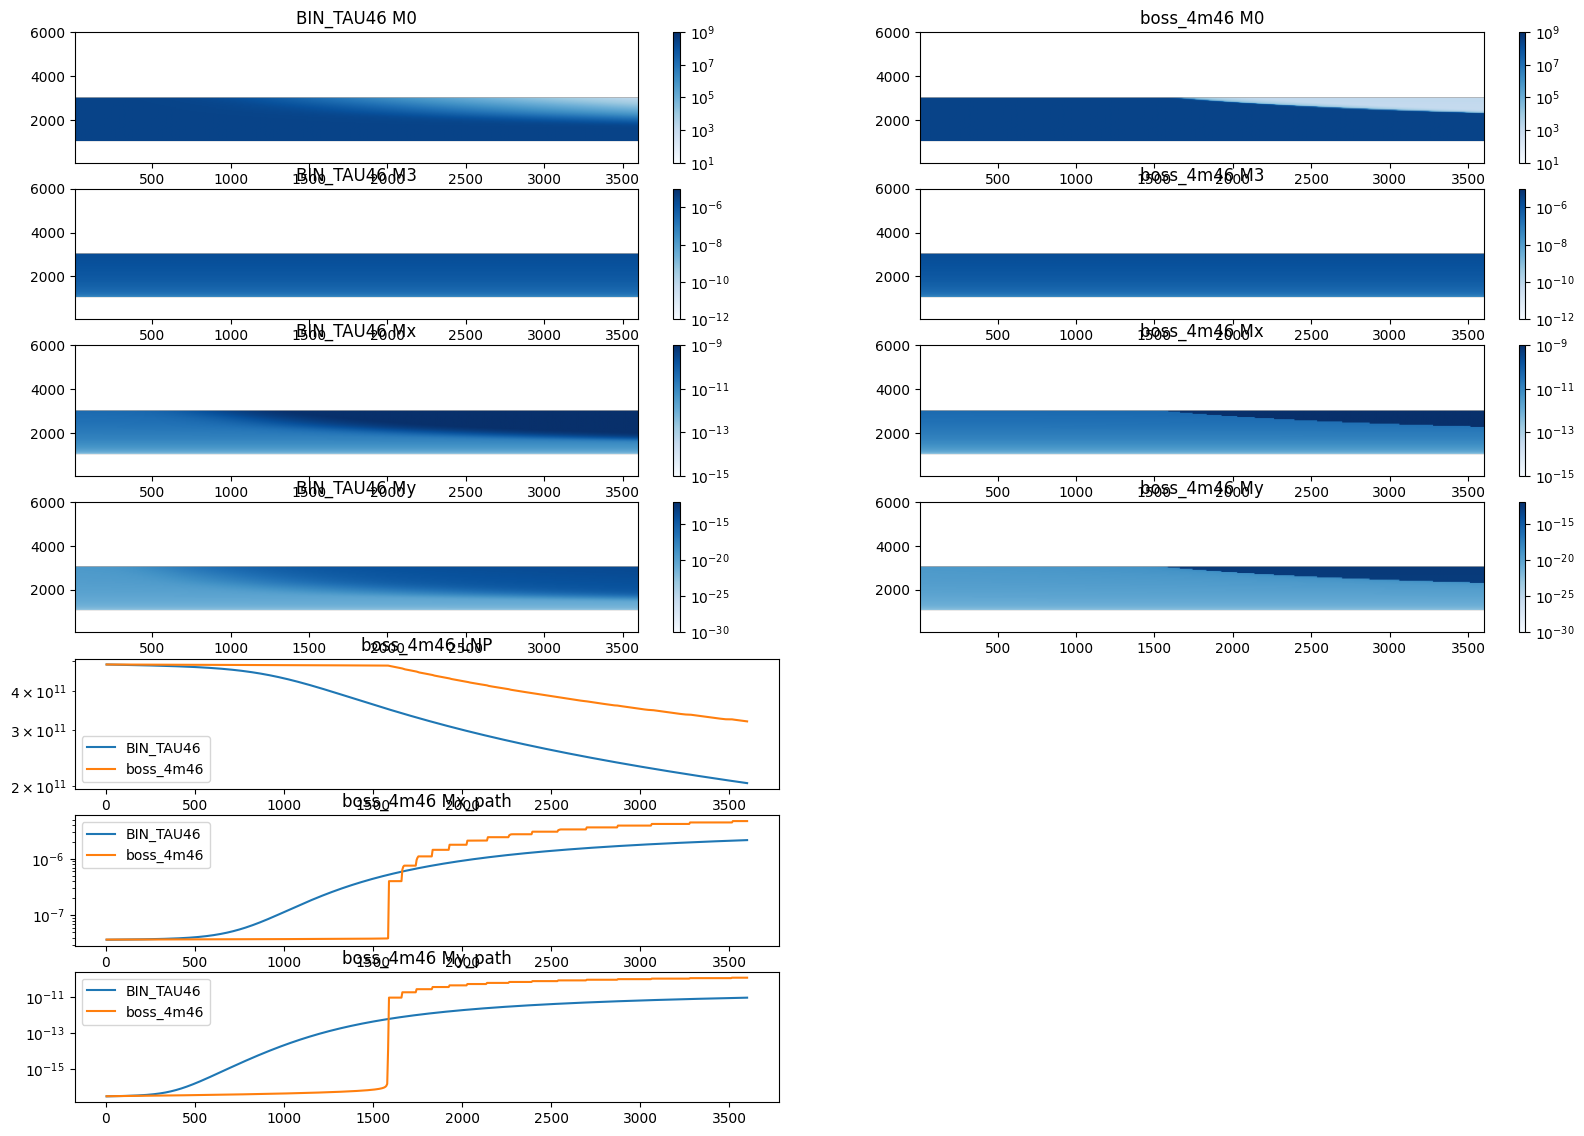

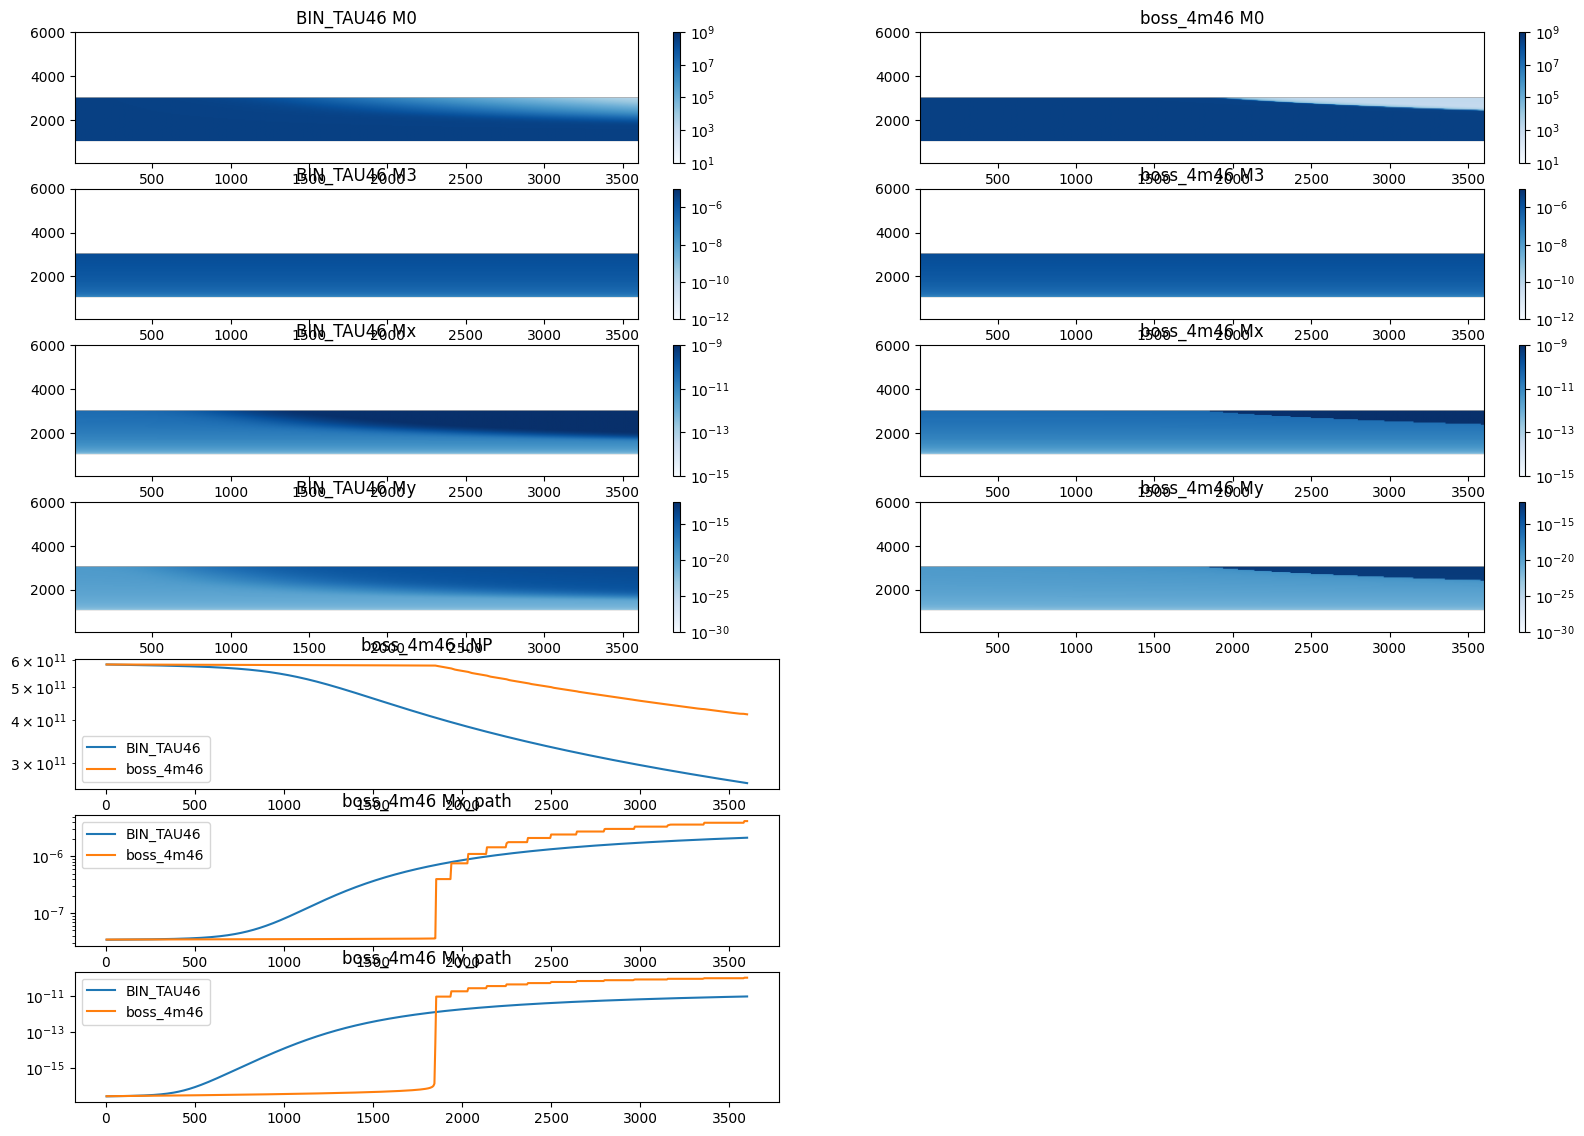

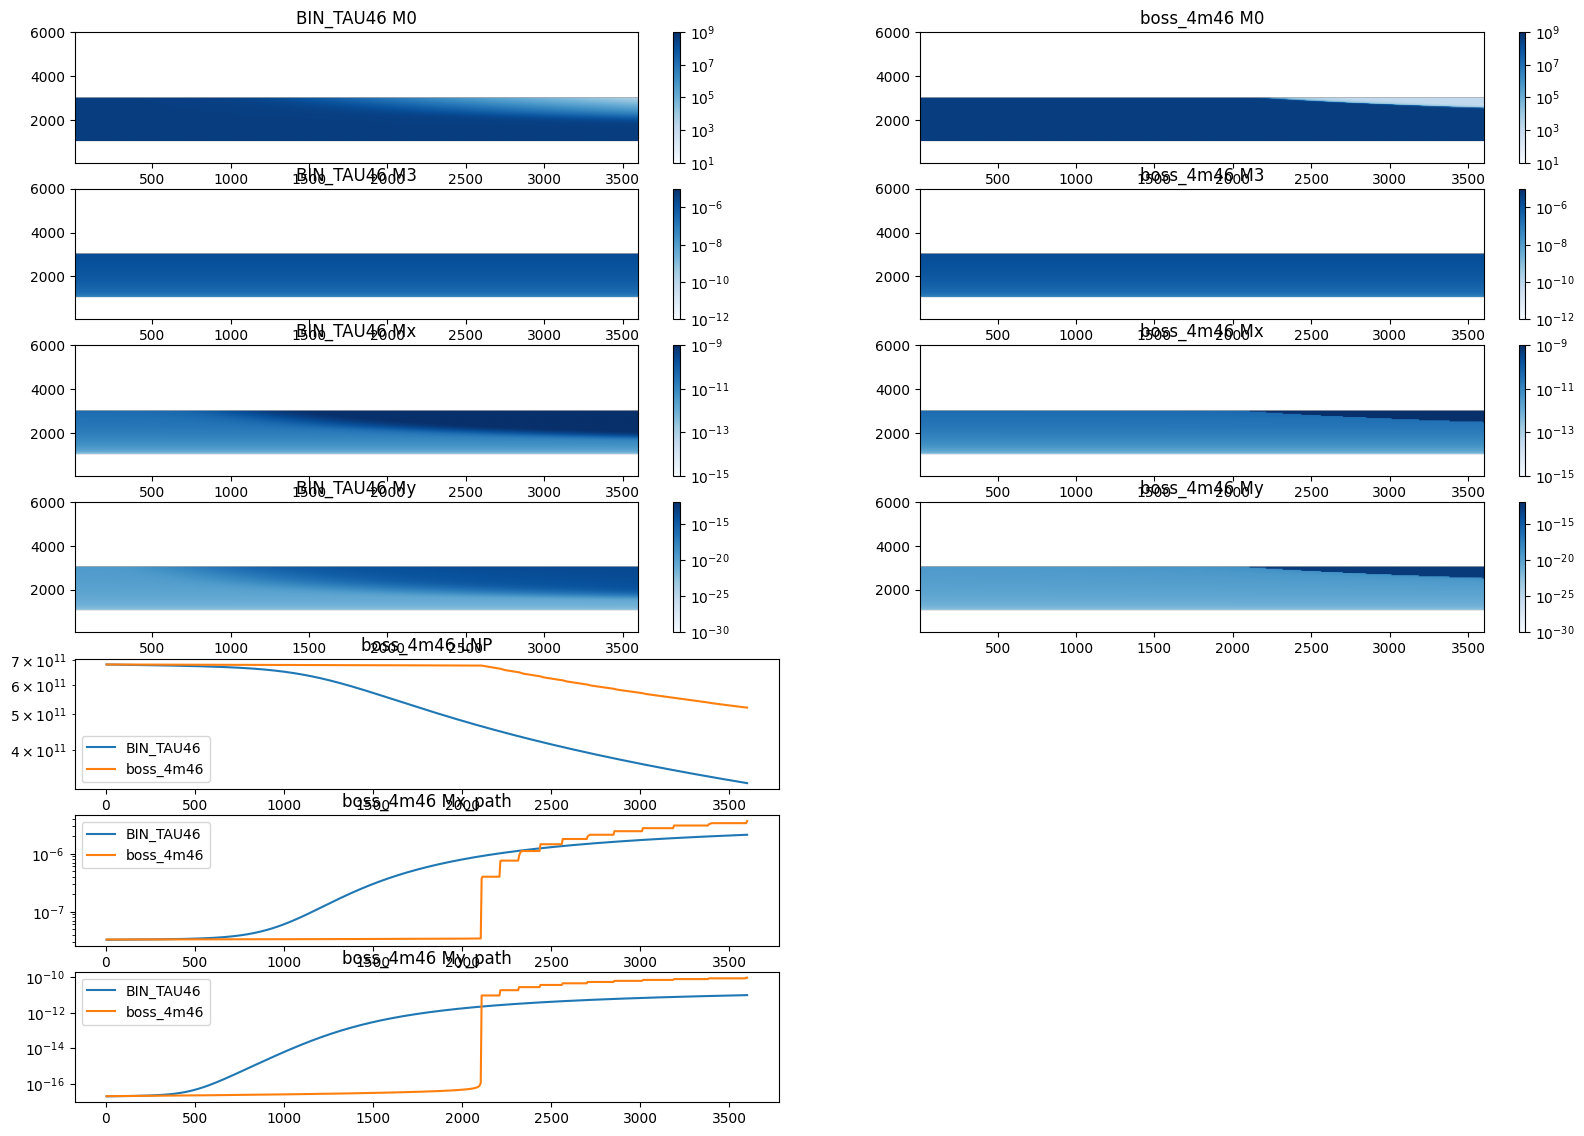

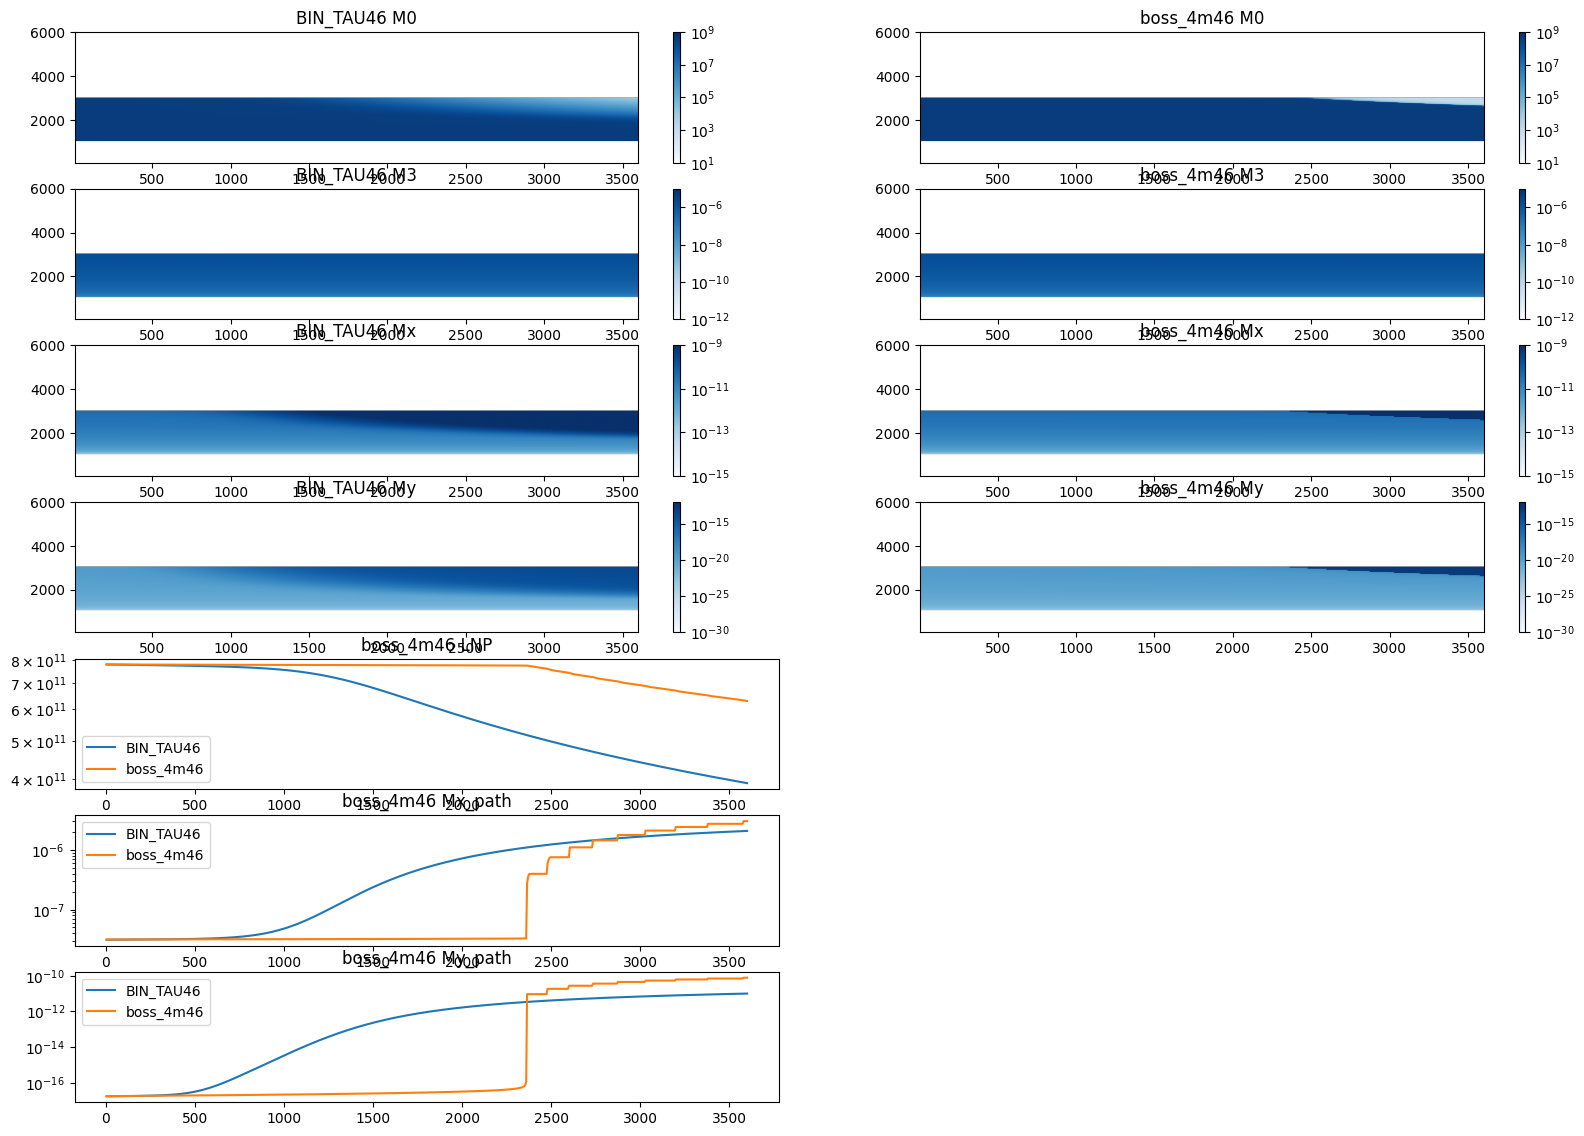

In [ ]:
z = nc_dict['z']
time = nc_dict['time']
mps = [target_mp, 'boss_4m46']
vars2plot = ['M0', 'M3', 'Mx', 'My', 'LNP', 'Mx_path', 'My_path']

for combo in tqdm(itertools.product([vars_strs[0][5]], vars_strs[1])):
    ic_str = "".join(combo)
    fig = plt.figure(figsize=(20,20))
    gs = gridspec.GridSpec(10,2)
    vrange = {'M0': [1e1, 1e9],
            'M3': [1e-12, 1e-5],
            'Mx': [1e-15, 1e-9],
            'My': [1e-30, 1e-12],
            'dm0_coal': [1e1, 1e6],
            'dmx_coal': [1e-19, 1e-9],
            'dmy_coal': [1e-30, 1e-12],}

    for ivar, var in enumerate(vars2plot):
        if nc_dict[ic_str][mps[0]][var].ndim == 1:
            ax = fig.add_subplot(gs[ivar, 0])
            for imp, mp in enumerate(mps):
                plt.plot(time, nc_dict[ic_str][mp][var], label=mp)
            plt.title(mp + ' ' + var)
            plt.yscale('log')
            plt.legend()
        elif nc_dict[ic_str][mps[0]][var].ndim == 2:
            for imp, mp in enumerate(mps):
                ax = fig.add_subplot(gs[ivar, imp])
                
                plt.imshow(nc_dict[ic_str][mp][var], extent=(time[0], time[-1], z[0], z[-1]),
                        aspect='auto', cmap='Blues',
                        origin='lower', norm=LogNorm(vmin=vrange[var][0], vmax=vrange[var][1]))
                plt.title(mp + ' ' + var)
                plt.colorbar()
    # plt.savefig(plot_dir + 'boss_vs_bin_' + ic_str + '.png', dpi=300)

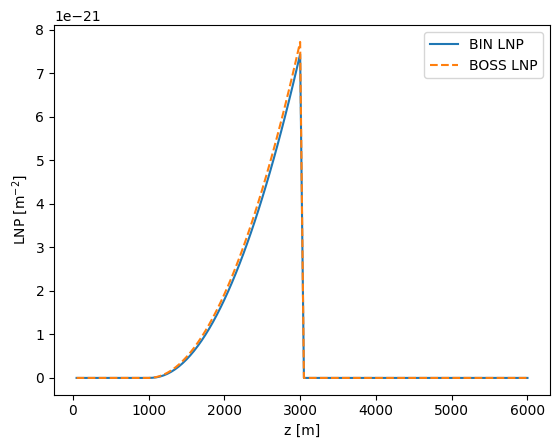

In [16]:
bin_LNP = nc_dict[ic_str]['BIN_TAU46']['LNP']
boss_LNP = nc_dict[ic_str]['boss_4m46']['LNP']
bin_LNC = nc_dict[ic_str]['BIN_TAU46']['My']
boss_LNC = nc_dict[ic_str]['boss_4m46']['My']
plt.plot(z, bin_LNC[:,0], label='BIN LNP')
plt.plot(z, boss_LNC[:,0], ls='--', label='BOSS LNP')
plt.xlabel('z [m]')
plt.ylabel('LNP [m$^{-2}$]')
# plt.yscale('log')
plt.legend()

In [155]:
bin_LNC[59,0]/boss_LNC[59,0]
# plt.plot(z, boss_LNC[:,0], ls='--', label='BOSS LNP')

0.9856247747459448

In [ ]:
#2d histograms